# Masana Nashimoto Project 2

### For this project, I wanted to create predictor models for Uber stock from 2019 spring to 2022 spring. Anyone who is investing can use a reliable stock prediction to increase their earnings. Using this dataset shown in this project, investors will easily be able to predict a stock price based on how the stock perfromed from the past. This will help inexperienced investors more acurately and effectively invest their money accordingly. 
Dataset source: 
<a href="https://www.kaggle.com/datasets/varpit94/uber-stock-data"> https://www.kaggle.com/datasets/varpit94/uber-stock-data </a>

# Setting Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# https://www.kaggle.com/datasets/varpit94/uber-stock-data

df = pd.read_csv("UBER.csv")
df.shape

(725, 7)

In [2]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...,...
720,2022-03-18,32.520000,33.419998,32.330002,33.360001,33.360001,35779700
721,2022-03-21,32.820000,32.820000,31.250000,31.980000,31.980000,35200600
722,2022-03-22,31.930000,33.599998,31.840000,33.349998,33.349998,21852800
723,2022-03-23,32.709999,33.680000,32.570000,33.060001,33.060001,19024700


## Data wrangling and cleaning

In [3]:
# # Convert the 'date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Set Date as Index instead of a column
df.set_index('Date', inplace=True)

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...
2022-03-18,32.520000,33.419998,32.330002,33.360001,33.360001,35779700
2022-03-21,32.820000,32.820000,31.250000,31.980000,31.980000,35200600
2022-03-22,31.930000,33.599998,31.840000,33.349998,33.349998,21852800


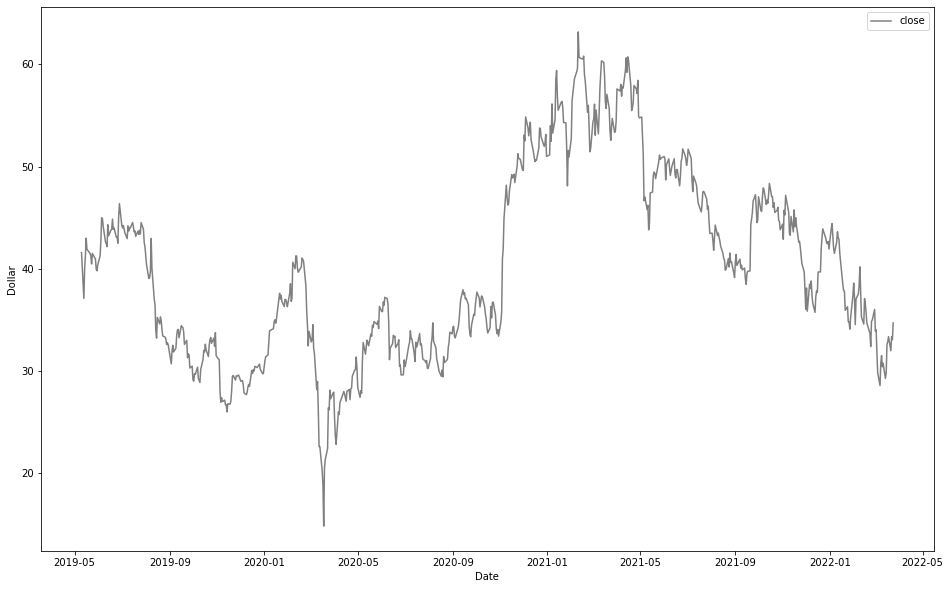

In [6]:
plt.figure(figsize=(16,10))
plt.plot(df['Close'], label='close', color='grey')
plt.xlabel('Date')
plt.ylabel('Dollar')
plt.legend()

The Uber stock was the loest on 2020-03-18 and highest on 2021-02-10 in this dataset

In [7]:
df['Close'].idxmin(),df['Close'].idxmax()

(Timestamp('2020-03-18 00:00:00'), Timestamp('2021-02-10 00:00:00'))

In [8]:
# A moving average is a statistic that captures the average change in a data series over time. 
# In finance, moving averages are often used by technical analysts to keep track of price trends for specific securities.

# Source: https://www.investopedia.com/terms/m/movingaverage.asp#:~:text=A%20moving%20average%20is%20a,price%20trends%20for%20specific%20securities.
# https://corporatefinanceinstitute.com/resources/capital-markets/simple-moving-average-sma/

# SMA stands for simple moving average




#short
SMA5 = 5
#medium
SMA10 = 10
#long
SMA15 = 15

# adds a new column 'SMA 5/10/15' to the DataFrame
# which contains the Simple Moving Average of the 'Close' price over the last 'SMA 5/10/15' periods.
df['SMA5'] = df['Close'].rolling(window=SMA5).mean()
df['SMA10'] = df['Close'].rolling(window=SMA10).mean()
df['SMA15'] = df['Close'].rolling(window=SMA15).mean()

# Difference from open to close
df['Difference'] = df['Open'] - df['Close']

# Close Difference from day prior
df['Close Diff'] = df['Close'].diff()

# Close differnece to next day
df['Close Next'] = df['Close'].shift(-1)

df.iloc[1:20,]

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA10,SMA15,Difference,Close Diff,Close Next
Date,,,,,,,,,,,,
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,NaN,NaN,NaN,1.690003,-4.470002,39.959999
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,NaN,NaN,NaN,-1.649998,2.860001,41.290001
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,NaN,NaN,NaN,-1.920002,1.330002,43.000000
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,40.584000,NaN,NaN,-1.520000,1.709999,41.910000
2019-05-17,41.980000,43.290001,41.270000,41.910000,41.910000,20225700,40.652000,NaN,NaN,0.070000,-1.090000,41.590000
2019-05-20,41.189999,41.680000,39.459999,41.590000,41.590000,29222300,41.550000,NaN,NaN,-0.400001,-0.320000,41.500000
2019-05-21,42.000000,42.240002,41.250000,41.500000,41.500000,10802900,41.858000,NaN,NaN,0.500000,-0.090000,41.250000
2019-05-22,41.049999,41.279999,40.500000,41.250000,41.250000,9089500,41.850000,NaN,NaN,-0.200001,-0.250000,40.470001
2019-05-23,40.799999,41.090000,40.020000,40.470001,40.470001,11119900,41.344000,40.964,NaN,0.329998,-0.779999,41.509998


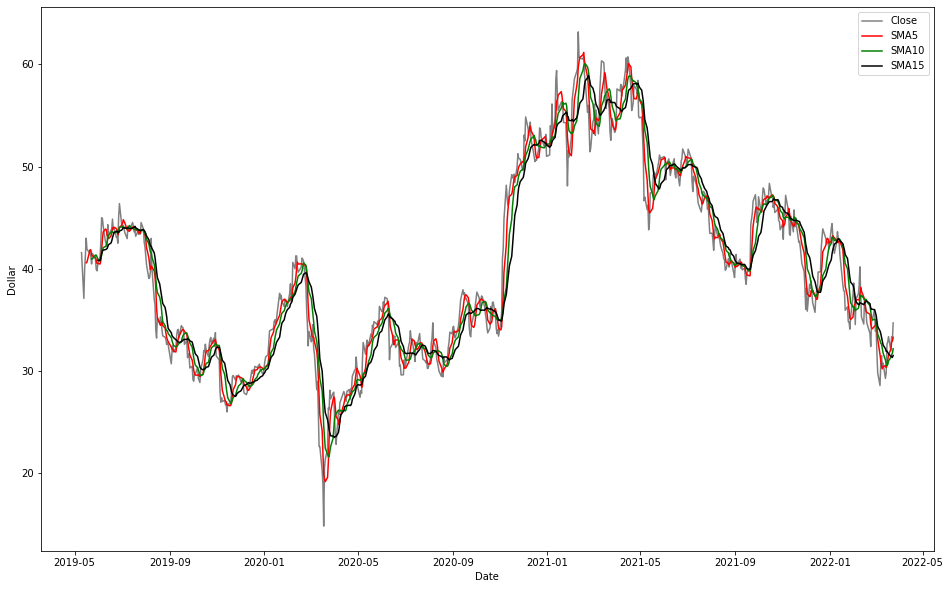

In [9]:
# Plot SMA1, 2, 3 against actual Closed value

plt.figure(figsize=(16,10))
plt.plot(df['Close'],label='Close', color ='grey')
plt.plot(df['SMA5'], label='SMA5', color = 'red')
plt.plot(df['SMA10'], label='SMA10', color = 'green')
plt.plot(df['SMA15'], label='SMA15', color = 'black')
plt.xlabel('Date')
plt.ylabel('Dollar')
plt.legend()

Dropnull values

In [10]:
# Drop any rows with NaN value
df = df.dropna(axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA10,SMA15,Difference,Close Diff,Close Next
Date,,,,,,,,,,,,
2019-05-31,41.150002,41.570000,39.410000,40.410000,40.410000,23209800,40.521999,40.933,40.816666,0.740002,0.610001,41.250000
2019-06-03,40.743999,41.849998,40.240002,41.250000,41.250000,16605300,40.470000,40.867,40.795333,-0.506001,0.840000,42.750000
2019-06-04,42.560001,42.880001,40.700001,42.750000,42.750000,23432100,40.830000,40.983,41.172000,-0.189999,1.500000,45.000000
2019-06-05,42.869999,45.660000,42.500000,45.000000,45.000000,28609600,41.842000,41.333,41.508000,-2.130001,2.250000,44.919998
2019-06-06,45.000000,45.750000,44.279999,44.919998,44.919998,16403700,42.866000,41.700,41.750000,0.080002,-0.080002,44.160000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,32.340000,32.919998,31.570000,32.849998,32.849998,27278600,31.058000,30.634,31.800000,-0.509998,0.239997,33.360001
2022-03-18,32.520000,33.419998,32.330002,33.360001,33.360001,35779700,31.578000,30.987,31.692000,-0.840001,0.510003,31.980000
2022-03-21,32.820000,32.820000,31.250000,31.980000,31.980000,35200600,32.120000,31.328,31.422000,0.840000,-1.380001,33.349998


Select varaibles that are relevant for training and test set

In [11]:
df = df[['Open', 'High', 'Low', 'Close', 'SMA5', 'SMA10', 'SMA15', 'Difference', 'Close Diff', 'Close Next']]
df

,Open,High,Low,Close,SMA5,SMA10,SMA15,Difference,Close Diff,Close Next
Date,,,,,,,,,,
2019-05-31,41.150002,41.570000,39.410000,40.410000,40.521999,40.933,40.816666,0.740002,0.610001,41.250000
2019-06-03,40.743999,41.849998,40.240002,41.250000,40.470000,40.867,40.795333,-0.506001,0.840000,42.750000
2019-06-04,42.560001,42.880001,40.700001,42.750000,40.830000,40.983,41.172000,-0.189999,1.500000,45.000000
2019-06-05,42.869999,45.660000,42.500000,45.000000,41.842000,41.333,41.508000,-2.130001,2.250000,44.919998
2019-06-06,45.000000,45.750000,44.279999,44.919998,42.866000,41.700,41.750000,0.080002,-0.080002,44.160000
...,...,...,...,...,...,...,...,...,...,...
2022-03-17,32.340000,32.919998,31.570000,32.849998,31.058000,30.634,31.800000,-0.509998,0.239997,33.360001
2022-03-18,32.520000,33.419998,32.330002,33.360001,31.578000,30.987,31.692000,-0.840001,0.510003,31.980000
2022-03-21,32.820000,32.820000,31.250000,31.980000,32.120000,31.328,31.422000,0.840000,-1.380001,33.349998


Split train set to first 2 years and 3 months and test set to 6 months rather than shuffling data

In [12]:
train = df['2019-05-01' : '2021-08-31']

# Create train sets
X_train = train.iloc[:,0:9]
y_train = train.iloc[:,-1]

train

,Open,High,Low,Close,SMA5,SMA10,SMA15,Difference,Close Diff,Close Next
Date,,,,,,,,,,
2019-05-31,41.150002,41.570000,39.410000,40.410000,40.521999,40.933,40.816666,0.740002,0.610001,41.250000
2019-06-03,40.743999,41.849998,40.240002,41.250000,40.470000,40.867,40.795333,-0.506001,0.840000,42.750000
2019-06-04,42.560001,42.880001,40.700001,42.750000,40.830000,40.983,41.172000,-0.189999,1.500000,45.000000
2019-06-05,42.869999,45.660000,42.500000,45.000000,41.842000,41.333,41.508000,-2.130001,2.250000,44.919998
2019-06-06,45.000000,45.750000,44.279999,44.919998,42.866000,41.700,41.750000,0.080002,-0.080002,44.160000
...,...,...,...,...,...,...,...,...,...,...
2021-08-25,40.439999,42.110001,40.040001,41.549999,40.506000,41.086,41.869333,-1.110000,1.380001,40.619999
2021-08-26,41.490002,41.939999,40.540001,40.619999,40.657999,40.875,41.706000,0.870003,-0.930000,40.689999
2021-08-27,40.529999,41.310001,40.500000,40.689999,40.805999,40.722,41.466667,-0.160000,0.070000,39.590000


In [13]:
test = df['2021-09-01' :]

# Create test sets
X_test = test.iloc[:,0:9]
y_test = test.iloc[:,-1]

test

,Open,High,Low,Close,SMA5,SMA10,SMA15,Difference,Close Diff,Close Next
Date,,,,,,,,,,
2021-09-01,39.980000,41.665001,39.869999,40.619999,40.131999,40.318999,40.768000,-0.639999,1.480000,41.400002
2021-09-02,40.750000,41.860001,40.536999,41.400002,40.288000,40.473000,40.679333,-0.650002,0.780003,40.320000
2021-09-03,41.220001,41.575001,40.230000,40.320000,40.214000,40.509999,40.552667,0.900001,-1.080002,40.950001
2021-09-07,40.490002,41.080002,40.310001,40.950001,40.486000,40.505000,40.516000,-0.459999,0.630001,40.070000
2021-09-08,40.849998,41.340000,39.830002,40.070000,40.672000,40.495000,40.454000,0.779998,-0.880001,40.349998
...,...,...,...,...,...,...,...,...,...,...
2022-03-17,32.340000,32.919998,31.570000,32.849998,31.058000,30.634000,31.800000,-0.509998,0.239997,33.360001
2022-03-18,32.520000,33.419998,32.330002,33.360001,31.578000,30.987000,31.692000,-0.840001,0.510003,31.980000
2022-03-21,32.820000,32.820000,31.250000,31.980000,32.120000,31.328000,31.422000,0.840000,-1.380001,33.349998


# Cross Validation on a Linear Regression Model

In [14]:
# Create an empty list to store validation scores
scores = []

# number of folds
n_splits = 4

# Create the time series cross-validator object
ts_cv = TimeSeriesSplit(n_splits=n_splits)

# Perform cross-validation on the training data
for train_index, valid_index in ts_cv.split(X_train):
    
    # Split the data into training and validation sets for this fold
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    # Fit a linear regression model to the training data
    linear_regression = LinearRegression().fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation set
    y_pred = linear_regression.predict(X_valid_fold)
    
    # Calculate the RMSE for the set predictions
    rmse = np.sqrt(mean_squared_error(y_valid_fold, y_pred))
    scores.append(rmse)


Acurracy of the cross validator. Can expect an error $1.4 &lt;in> $30-$60 range 

In [15]:
print("CV score:",np.mean(scores))
print("Root Mean Squared Error (RMSE):", rmse)

CV score: 1.3592703082528694
Root Mean Squared Error (RMSE): 1.1951047005102682


In [16]:
# Make a new set of dataframe to prepare comparing each other on the graph
y_pred = linear_regression.predict(X_test)
df_result = test[['Close Next']]
df_result['Close Pred'] = y_pred
y_pred.shape

(141,)

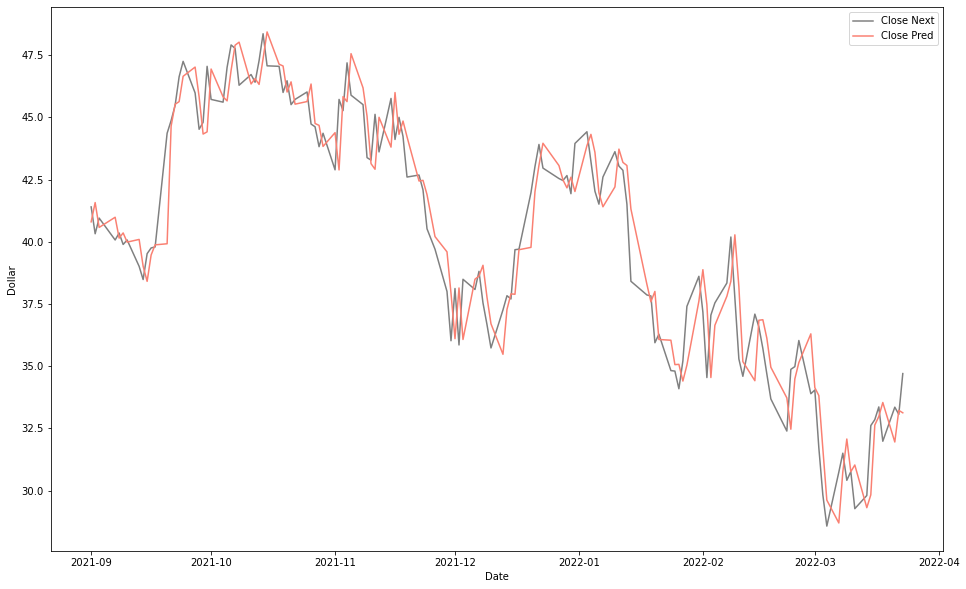

In [17]:
plt.figure(figsize=(16,10))
plt.plot(df_result['Close Next'], label='Close Next', color='grey')
plt.plot(df_result['Close Pred'], label='Close Pred', color='salmon')
plt.xlabel('Date')
plt.ylabel('Dollar')
plt.legend()

# Random Forest Model

In [18]:
# Create and fit the random forest model
forest = RandomForestRegressor(n_estimators=10, random_state=24)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=24)

In [19]:
# Evaluate the model on the testing set
pred_score = forest.score(X_test, y_test)
print('Model accuracy:', pred_score)
X_test.shape

Model accuracy: 0.9040372875133285


(141, 9)

In [20]:
y_pred = forest.predict(X_test)
df_result_forest = test[['Close Next']]
df_result_forest['Close Pred'] = y_pred

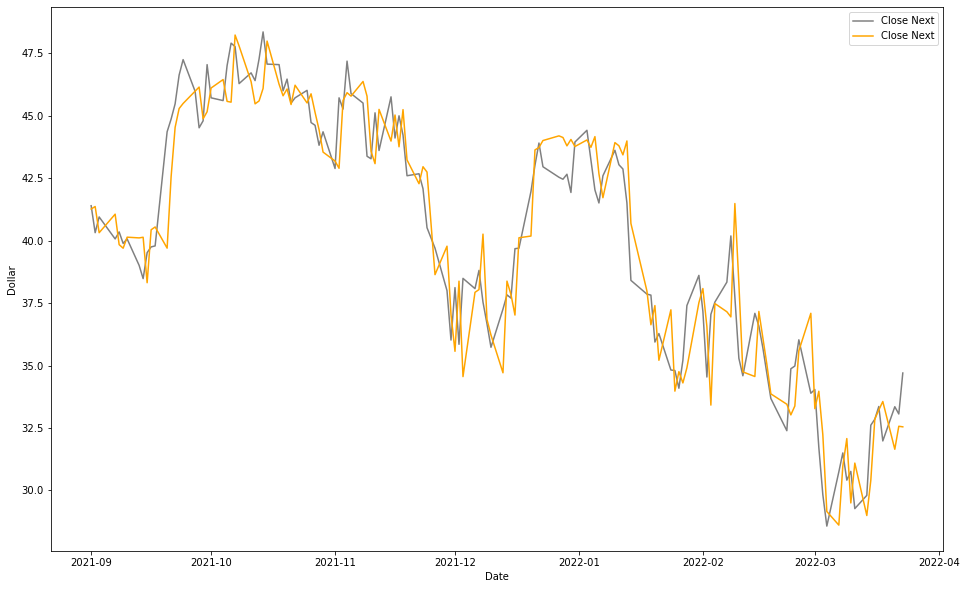

In [21]:
plt.figure(figsize=(16,10))
plt.plot(df_result_forest['Close Next'], label='Close Next', color='grey')
plt.plot(df_result_forest['Close Pred'], label='Close Next', color='orange')
plt.xlabel('Date')
plt.ylabel('Dollar')
plt.legend()

In [22]:
# Assign column names
column_names = list(df.columns)
column_names

['Open',
 'High',
 'Low',
 'Close',
 'SMA5',
 'SMA10',
 'SMA15',
 'Difference',
 'Close Diff',
 'Close Next']

In [23]:
# Select all of the predictors
feature_columns = column_names[0:9]

In [24]:
# Importance in random forest
importance = forest.feature_importances_
feature_importance = pd.DataFrame(importance, index= feature_columns, columns=["Importance"])

# Sort from high to low
feature_importance.sort_values(by=["Importance"], ascending= False)

,Importance
Close,0.625097
High,0.253589
Low,0.106787
Open,0.005088
Close Diff,0.002489
SMA15,0.002360
SMA10,0.001655
Difference,0.001589
SMA5,0.001346


# Conclusion

### Both cross validation linear regression and random forest model performed relatively well on this data set. Cross validation linear regression off by \\$1.4 and random forest model with model accuracy of  0.90. It's a close call but comparing between the two plots, cross validation linear regression is the winner.